In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_datos ="datasets/datos_corregidos.csv"
datos = pd.read_csv(file_datos)
datos

,height,utm_x,utm_y,distance,slope,sum_distance,velocidad,timestamp,ds,velocidad_gps,consumo_total,consumo_inst,latitud,longitud
0,2321.3,703370.246811,9.615522e+06,32.140962,0.0,32.140962,1.607048e+07,1502.816918,0.000002,58.08,3091.95,13.60,86.125422,-52.898496
1,2321.3,703350.750075,9.615497e+06,32.018551,0.0,64.159514,1.600928e+07,1502.816920,0.000002,58.28,3091.96,13.25,86.125300,-52.902438
2,2321.3,703334.581834,9.615468e+06,32.479600,0.0,96.639113,1.623980e+07,1502.816922,0.000002,58.60,3091.97,13.65,86.125141,-52.906158
3,2321.3,703322.631750,9.615438e+06,32.860444,0.0,129.499557,1.643022e+07,1502.816924,0.000002,59.17,3091.98,13.75,86.124946,-52.909527
4,2321.3,703314.124281,9.615406e+06,32.950891,0.0,162.450449,1.647545e+07,1502.816926,0.000002,59.91,3091.99,13.70,86.124727,-52.912563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217,2058.3,699520.322587,9.559082e+06,0.110590,0.0,102977.746000,5.529495e+04,1502.822865,0.000002,0.00,3102.46,0.60,85.684649,-56.504253
4218,2058.3,699520.322346,9.559082e+06,0.110590,0.0,102977.856590,5.529495e+04,1502.822867,0.000002,0.04,3102.46,0.60,85.684648,-56.504259
4219,2058.3,699520.322104,9.559081e+06,0.110590,0.0,102977.967179,5.529495e+04,1502.822869,0.000002,0.02,3102.46,0.60,85.684647,-56.504264
4220,2058.3,699520.321863,9.559081e+06,0.110590,0.0,102978.077769,5.529495e+04,1502.822871,0.000002,0.02,3102.46,0.70,85.684646,-56.504270


In [13]:
datos["velocidad_gps-ms"] = datos['velocidad_gps'] * 1000/3600
datos["next_vel"] = datos["velocidad_gps-ms"].shift(-1)

dt = 2

datos['aceleracion'] = ((datos["velocidad_gps-ms"] - datos["next_vel"])) / dt

In [14]:
datos

,height,utm_x,utm_y,distance,slope,sum_distance,velocidad,timestamp,ds,velocidad_gps,...,next_vel,aceleracion,fd,Rx,Rg,Ri,fx,potencia_rueda,potencia_motor,caudal_inst
0,2321.3,703370.246811,9.615522e+06,32.140962,0.0,32.140962,1.607048e+07,1502.816918,0.000002,58.08,...,16.188889,-0.027778,198.672969,249.704,0.0,-88.472222,359.904747,5806.463250,21505.419443,0.213347
1,2321.3,703350.750075,9.615497e+06,32.018551,0.0,64.159514,1.600928e+07,1502.816920,0.000002,58.28,...,16.277778,-0.044444,200.043596,249.704,0.0,-141.555556,308.192041,4989.286700,18478.839631,0.183322
2,2321.3,703334.581834,9.615468e+06,32.479600,0.0,96.639113,1.623980e+07,1502.816922,0.000002,58.60,...,16.436111,-0.079167,202.246400,249.704,0.0,-252.145833,199.804566,3252.374327,12045.830842,0.119502
3,2321.3,703322.631750,9.615438e+06,32.860444,0.0,129.499557,1.643022e+07,1502.816924,0.000002,59.17,...,16.641667,-0.102778,206.200021,249.704,0.0,-327.347222,128.556799,2112.973830,7825.829001,0.077637
4,2321.3,703314.124281,9.615406e+06,32.950891,0.0,162.450449,1.647545e+07,1502.816926,0.000002,59.91,...,16.641667,0.000000,211.389887,249.704,0.0,0.000000,461.093887,7673.370765,28419.891721,0.281943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217,2058.3,699520.322587,9.559082e+06,0.110590,0.0,102977.746000,5.529495e+04,1502.822865,0.000002,0.00,...,0.011111,-0.005556,0.000000,249.704,0.0,-17.694444,232.009556,0.000000,0.000000,0.000000
4218,2058.3,699520.322346,9.559082e+06,0.110590,0.0,102977.856590,5.529495e+04,1502.822867,0.000002,0.04,...,0.005556,0.002778,0.000094,249.704,0.0,8.847222,258.551316,2.872792,10.639972,0.000106
4219,2058.3,699520.322104,9.559081e+06,0.110590,0.0,102977.967179,5.529495e+04,1502.822869,0.000002,0.02,...,0.005556,0.000000,0.000024,249.704,0.0,0.000000,249.704024,1.387245,5.137943,0.000051
4220,2058.3,699520.321863,9.559081e+06,0.110590,0.0,102978.077769,5.529495e+04,1502.822871,0.000002,0.02,...,0.000000,0.002778,0.000024,249.704,0.0,8.847222,258.551246,1.436396,5.319984,0.000053


In [5]:
def est_energia(data, densidad_aire = 0.893, fr=0.008, rd=0.191, area_front=3.419, masa=3185, g=9.8, cd=0.5, rend_motor = 0.30, rend_trans = 0.9, LHV = 432000, densidad_diesel = 840 ):
    
    '''LHV en J/L = (43200 kJ/kg) x (1000 J/kJ) ÷ (0,84 kg/L) = 51428571.43 J/L '''
    
    Fd = (0.5) * densidad_aire * cd * area_front * (datos["velocidad_gps-ms"] ** 2)
    Rx = fr * masa * g * np.cos(np.degrees(np.arctan(datos['slope'])))
    Rg = masa * g *np.sin(np.degrees(np.arctan(datos['slope'])))
    Ri = masa * datos['aceleracion']
    
    datos['fd'] = Fd
    datos['Rx'] = Rx
    datos['Rg'] = Rg
    datos['Ri'] = Ri

    fx = Fd + Rx + Rg + Ri
    
    datos['fx'] = fx

    potencia_rueda = fx * datos["velocidad_gps-ms"]
    
    datos['potencia_rueda'] = potencia_rueda

    potencia_motor = potencia_rueda / (rend_motor * rend_trans)
    
    datos['potencia_motor'] = potencia_motor

    caudal_inst = potencia_motor / (LHV * densidad_diesel )

    datos['caudal_inst'] = caudal_inst * 3600

    return datos

In [6]:
datos_energia = est_energia(datos)
datos_energia

,height,utm_x,utm_y,distance,slope,sum_distance,velocidad,timestamp,ds,velocidad_gps,...,next_vel,aceleracion,fd,Rx,Rg,Ri,fx,potencia_rueda,potencia_motor,caudal_inst
0,2321.3,703370.246811,9.615522e+06,32.140962,0.0,32.140962,1.607048e+07,1502.816918,0.000002,58.08,...,16.188889,-0.027778,198.672969,249.704,0.0,-88.472222,359.904747,5806.463250,21505.419443,0.213347
1,2321.3,703350.750075,9.615497e+06,32.018551,0.0,64.159514,1.600928e+07,1502.816920,0.000002,58.28,...,16.277778,-0.044444,200.043596,249.704,0.0,-141.555556,308.192041,4989.286700,18478.839631,0.183322
2,2321.3,703334.581834,9.615468e+06,32.479600,0.0,96.639113,1.623980e+07,1502.816922,0.000002,58.60,...,16.436111,-0.079167,202.246400,249.704,0.0,-252.145833,199.804566,3252.374327,12045.830842,0.119502
3,2321.3,703322.631750,9.615438e+06,32.860444,0.0,129.499557,1.643022e+07,1502.816924,0.000002,59.17,...,16.641667,-0.102778,206.200021,249.704,0.0,-327.347222,128.556799,2112.973830,7825.829001,0.077637
4,2321.3,703314.124281,9.615406e+06,32.950891,0.0,162.450449,1.647545e+07,1502.816926,0.000002,59.91,...,16.641667,0.000000,211.389887,249.704,0.0,0.000000,461.093887,7673.370765,28419.891721,0.281943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217,2058.3,699520.322587,9.559082e+06,0.110590,0.0,102977.746000,5.529495e+04,1502.822865,0.000002,0.00,...,0.011111,-0.005556,0.000000,249.704,0.0,-17.694444,232.009556,0.000000,0.000000,0.000000
4218,2058.3,699520.322346,9.559082e+06,0.110590,0.0,102977.856590,5.529495e+04,1502.822867,0.000002,0.04,...,0.005556,0.002778,0.000094,249.704,0.0,8.847222,258.551316,2.872792,10.639972,0.000106
4219,2058.3,699520.322104,9.559081e+06,0.110590,0.0,102977.967179,5.529495e+04,1502.822869,0.000002,0.02,...,0.005556,0.000000,0.000024,249.704,0.0,0.000000,249.704024,1.387245,5.137943,0.000051
4220,2058.3,699520.321863,9.559081e+06,0.110590,0.0,102978.077769,5.529495e+04,1502.822871,0.000002,0.02,...,0.000000,0.002778,0.000024,249.704,0.0,8.847222,258.551246,1.436396,5.319984,0.000053


In [7]:
datos_energia.columns

Index(['height', 'utm_x', 'utm_y', 'distance', 'slope', 'sum_distance',
       'velocidad', 'timestamp', 'ds', 'velocidad_gps', 'consumo_total',
       'consumo_inst', 'latitud', 'longitud', 'velocidad_gps-ms', 'next_vel',
       'aceleracion', 'fd', 'Rx', 'Rg', 'Ri', 'fx', 'potencia_rueda',
       'potencia_motor', 'caudal_inst'],
      dtype='object')

In [8]:
datos_energia_pos = datos_energia.loc[datos_energia['caudal_inst'] > 0]
datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
datos_energia_pos.dropna(inplace=True)
consumo_total_estimado = datos_energia_pos['caudal_inst'].sum()
consumo_total_estimado

/var/folders/5l/lkq4p7sx7v12lgqv9mwfy3nm0000gn/T/ipykernel_3015/938077076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/5l/lkq4p7sx7v12lgqv9mwfy3nm0000gn/T/ipykernel_3015/938077076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_energia_pos.dropna(inplace=True)


2126.737242860314

In [9]:
consumo_total_estimado

2126.737242860314

In [10]:
consumo_total_flujometro  = len(datos_energia.consumo_total) - datos_energia.consumo_total[0]
consumo_total_flujometro

1130.0500000000002

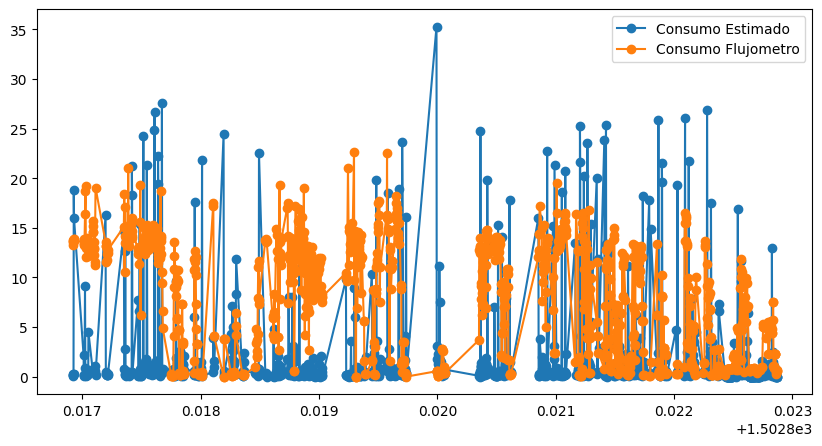

In [11]:

plt.figure(figsize=(10,5))
plt.plot(datos_energia_pos['timestamp'], datos_energia_pos['caudal_inst'],'-o',label='Consumo Estimado')
plt.plot(datos_energia_pos['timestamp'], datos_energia_pos['consumo_inst'], '-o',label='Consumo Flujometro')



plt.legend()
plt.show()

In [12]:
datos_energia_pos.to_csv('consumo_estimado_corregido.csv', index=False)